# Infant Classification

## Import necessary Libraries 

In [1]:
import os
import random
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random
from IPython.display import Image
import imutils   

from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report

import keras
import tensorflow.keras as K

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator, array_to_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Conv2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

import imutils    
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

## Data Visualization

In [2]:
#specify directory
train_dir = 'F:/Citrabatch4/Robi/GOES To KOMPRE/dataset/train/'
test_dir = 'F:/Citrabatch4/Robi/GOES To KOMPRE/dataset/val/'

In [3]:
#create classes
classes = os.listdir('F:/Citrabatch4/Robi/GOES To KOMPRE/dataset/train')

In [4]:
classes

['AOS', 'ASD', 'AVSD', 'EA', 'NORMAL', 'TOF', 'VSD']

In [5]:
files_path_dict = {}

for c in classes:
  files_path_dict[c] = list(map(lambda x: train_dir + c + '/' + x, os.listdir(train_dir + c)))

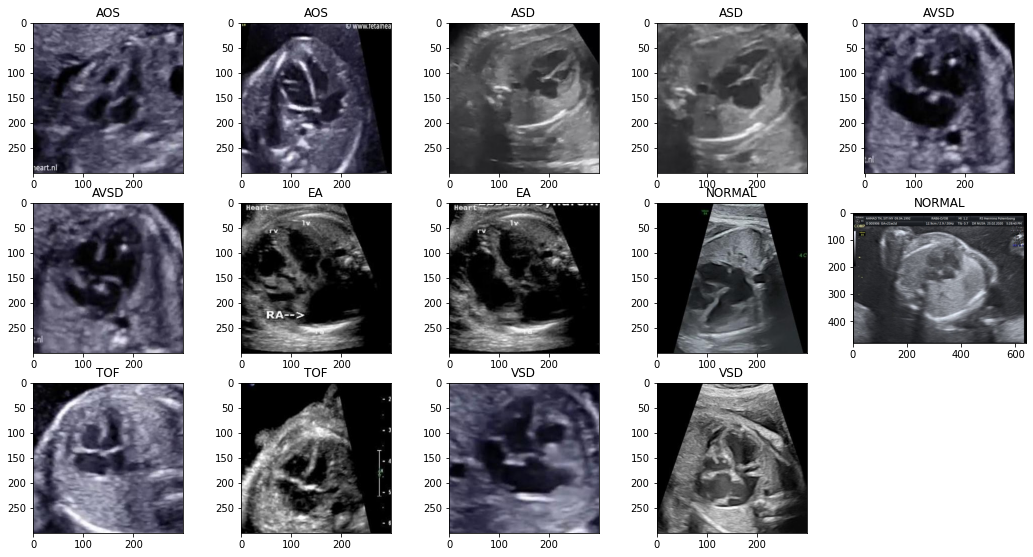

In [6]:
plt.figure(figsize = (18,16))
index = 0
for c in classes:
  random.shuffle(files_path_dict[c])
  path_list = files_path_dict[c][:5]

  for i in range(1, 3):
    index += 1
    plt.subplot(5, 5, index)
    plt.imshow(load_img(path_list[i]))
    plt.title(c)

In [7]:
#check the number of images in each class in the training dataset
No_images_per_class = []
Class_name = []

for i in os.listdir('F:/Citrabatch4/Robi/GOES To KOMPRE/dataset/train'):
  train_class = os.listdir(os.path.join('F:/Citrabatch4/Robi/GOES To KOMPRE/dataset/train', i))
  No_images_per_class.append(len(train_class))
  Class_name.append(i)
  print('Number of images in {} = {} \n'.format(i, len(train_class)))

Number of images in AOS = 81 

Number of images in ASD = 132 

Number of images in AVSD = 99 

Number of images in EA = 58 

Number of images in NORMAL = 144 

Number of images in TOF = 55 

Number of images in VSD = 86 



In [8]:
#check the number of images in each class in the training dataset
No_images_per_class = []
Class_name = []

for i in os.listdir('F:/Citrabatch4/Robi/GOES To KOMPRE/dataset/val'):
  train_class = os.listdir(os.path.join('F:/Citrabatch4/Robi/GOES To KOMPRE/dataset/val', i))
  No_images_per_class.append(len(train_class))
  Class_name.append(i)
  print('Number of images in {} = {} \n'.format(i, len(train_class)))

Number of images in AOS = 21 

Number of images in ASD = 34 

Number of images in AVSD = 25 

Number of images in EA = 15 

Number of images in NORMAL = 36 

Number of images in TOF = 14 

Number of images in VSD = 22 



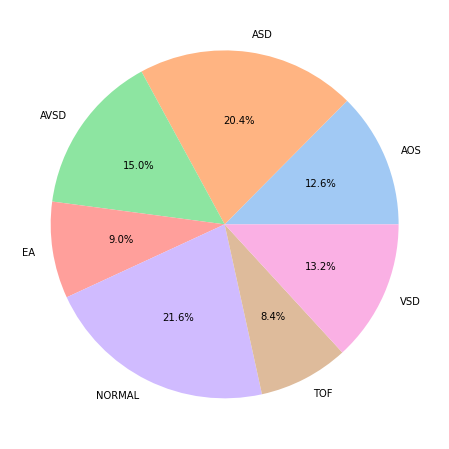

In [9]:
#visualize class distribution in train set
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')
plt.pie(No_images_per_class, 
        labels = Class_name, 
        autopct = '%1.1f%%',
        colors=colors)
plt.show()

## Data Augmentation

In [10]:
#use Image Data Generator to perform this task
# pake augmentasi

# datagen = ImageDataGenerator(rotation_range=10, #Menerapkan skenario rotasi gambar hingga 10 derajat
#                              height_shift_range=0.2, #Menerapkan skenario peninggian ganmbar hingga sebanyak 0.2 dari ukuran asli 
#                              horizontal_flip=True, #Menerapkan skenario putar balik gambar secara horizontal
#                              validation_split=0.2)

#dak pake augmentasi
datagen = ImageDataGenerator(validation_split=0.2)

train_data = datagen.flow_from_directory('F:/Citrabatch4/Robi/GOES To KOMPRE/dataset/train/',
                                         target_size=(240, 240),
                                         batch_size=8,
                                         class_mode='categorical',
                                         subset='training')

valid_data = datagen.flow_from_directory('F:/Citrabatch4/Robi/GOES To KOMPRE/dataset/train/',
                                         target_size=(240, 240),
                                         batch_size=8,
                                         class_mode='categorical',
                                         subset='validation')

#test set
test_datagen = ImageDataGenerator()

test_data = datagen.flow_from_directory('F:/Citrabatch4/Robi/GOES To KOMPRE/dataset/val/',
                                         target_size=(240, 240),
                                        class_mode='categorical',
                                        shuffle=False)
                                        

Found 527 images belonging to 7 classes.
Found 128 images belonging to 7 classes.
Found 167 images belonging to 7 classes.


In [11]:
#view the class dictionary
print(train_data.class_indices)
print(test_data.class_indices)

{'AOS': 0, 'ASD': 1, 'AVSD': 2, 'EA': 3, 'NORMAL': 4, 'TOF': 5, 'VSD': 6}
{'AOS': 0, 'ASD': 1, 'AVSD': 2, 'EA': 3, 'NORMAL': 4, 'TOF': 5, 'VSD': 6}


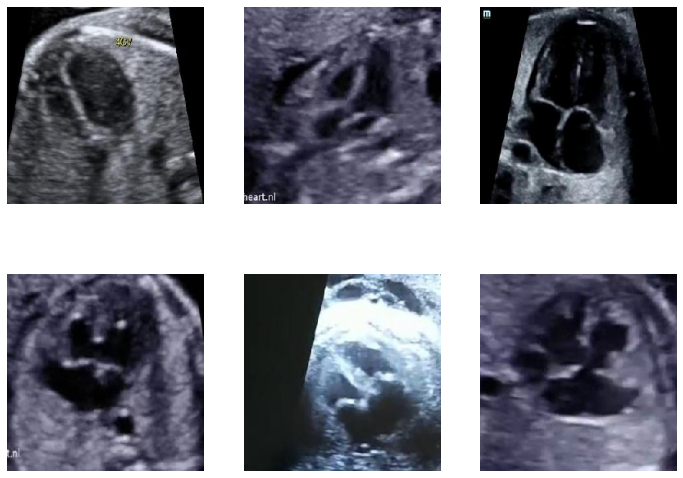

In [12]:
#view the augmented data
sample_x, sample_y = next(train_data)
plt.figure(figsize=(12, 9))
for i in range(6):
  plt.subplot(2, 3, i+1)
  sample = array_to_img(sample_x[i])
  plt.axis('off')
  plt.grid(False)
  plt.imshow(sample)
plt.show()

## Model Architecture

In [13]:
# #build the model
# effnet = tf.keras.applications.VGG19(weights='imagenet', 
#                         include_top=False, 
#                         input_shape=None)

# model = effnet.output
# model = GlobalAveragePooling2D()(model)
# model = Dropout(0.5)(model)
# # model = Dense(64, activation='relu')(model)
# # model = Dense(128, activation='relu')(model)
# # model = Dense(256, activation='relu')(model)
# # model = Dense(512, activation='relu')(model)
# # model = Dense(1024, activation='relu')(model)
# model = Dense(7, activation='softmax')(model)
# model = Model(inputs=effnet.input, 
#               outputs=model)

# #get summary()
# model.summary()
model = keras.Sequential()
model.add(keras.layers.Conv2D(input_shape=(240,240,3),filters=64,kernel_size=(3,3),padding="same", activation="selu"))
model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="selu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="selu"))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="selu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="selu"))
model.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="selu"))
model.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="selu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="selu"))
model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="selu"))
model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="selu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="selu"))
model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="selu"))
model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="selu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Conv2D(filters=1024, kernel_size=(3,3), padding="same", activation="selu"))
model.add(keras.layers.Conv2D(filters=1024, kernel_size=(3,3), padding="same", activation="selu"))
model.add(keras.layers.Conv2D(filters=1024, kernel_size=(3,3), padding="same", activation="selu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(units=4096,activation="selu"))
model.add(keras.layers.Dense(units=4096,activation="selu"))
model.add(keras.layers.Dense(units=7, activation="softmax"))

In [14]:
#compile model
model.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#define checkpoint
checkpoint = ModelCheckpoint('CNN_E100BS8_DATALAMA.h5', 
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='auto',
                             verbose=1)

#early stopping
# earlystop = EarlyStopping(monitor='val_accuracy',
#                           patience=15,
#                           mode='auto',
#                           verbose=1)

# #reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', 
                              factor = 0.3, 
                              patience = 2, 
                              min_delta = 0.001,
                              mode='auto',
                              verbose=1)

C:\Users\ISYSRG.COM\Anaconda3\envs\classgrad\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [15]:
%%time

#train the model
history = model.fit(train_data,
                    epochs = 100,
                    validation_data=valid_data,
                    verbose=1,
                    callbacks=[checkpoint, reduce_lr])

Epoch 1/100
66/66 [==============================] - ETA: 0s - loss: 18.4222 - accuracy: 0.2657
Epoch 00001: val_accuracy improved from -inf to 0.08594, saving model to CNN_E100BS8_DATALAMA.h5
66/66 [==============================] - 23s 293ms/step - loss: 18.4222 - accuracy: 0.2657 - val_loss: 6.9725 - val_accuracy: 0.0859 - lr: 1.0000e-04
Epoch 2/100
66/66 [==============================] - ETA: 0s - loss: 1.9702 - accuracy: 0.5806
Epoch 00002: val_accuracy improved from 0.08594 to 0.56250, saving model to CNN_E100BS8_DATALAMA.h5
66/66 [==============================] - 20s 301ms/step - loss: 1.9702 - accuracy: 0.5806 - val_loss: 2.5558 - val_accuracy: 0.5625 - lr: 1.0000e-04
Epoch 3/100
66/66 [==============================] - ETA: 0s - loss: 1.1581 - accuracy: 0.7609
Epoch 00003: val_accuracy improved from 0.56250 to 0.76562, saving model to CNN_E100BS8_DATALAMA.h5
66/66 [==============================] - 24s 358ms/step - loss: 1.1581 - accuracy: 0.7609 - val_loss: 1.0260 - val_acc

66/66 [==============================] - ETA: 0s - loss: 7.7927e-06 - accuracy: 1.0000
Epoch 00025: val_accuracy did not improve from 0.95312

Epoch 00025: ReduceLROnPlateau reducing learning rate to 2.1869998079182552e-08.
66/66 [==============================] - 7s 101ms/step - loss: 7.7927e-06 - accuracy: 1.0000 - val_loss: 0.9086 - val_accuracy: 0.9219 - lr: 7.2900e-08
Epoch 26/100
66/66 [==============================] - ETA: 0s - loss: 7.7923e-06 - accuracy: 1.0000
Epoch 00026: val_accuracy did not improve from 0.95312
66/66 [==============================] - 7s 101ms/step - loss: 7.7923e-06 - accuracy: 1.0000 - val_loss: 0.9086 - val_accuracy: 0.9219 - lr: 2.1870e-08
Epoch 27/100
66/66 [==============================] - ETA: 0s - loss: 7.7923e-06 - accuracy: 1.0000
Epoch 00027: val_accuracy did not improve from 0.95312

Epoch 00027: ReduceLROnPlateau reducing learning rate to 6.560999210591944e-09.
66/66 [==============================] - 7s 101ms/step - loss: 7.7923e-06 - accur

66/66 [==============================] - ETA: 0s - loss: 7.7921e-06 - accuracy: 1.0000
Epoch 00048: val_accuracy did not improve from 0.95312
66/66 [==============================] - 7s 102ms/step - loss: 7.7921e-06 - accuracy: 1.0000 - val_loss: 0.9086 - val_accuracy: 0.9219 - lr: 3.8742e-14
Epoch 49/100
66/66 [==============================] - ETA: 0s - loss: 7.7921e-06 - accuracy: 1.0000
Epoch 00049: val_accuracy did not improve from 0.95312

Epoch 00049: ReduceLROnPlateau reducing learning rate to 1.1622613068913538e-14.
66/66 [==============================] - 7s 103ms/step - loss: 7.7921e-06 - accuracy: 1.0000 - val_loss: 0.9086 - val_accuracy: 0.9219 - lr: 3.8742e-14
Epoch 50/100
66/66 [==============================] - ETA: 0s - loss: 7.7921e-06 - accuracy: 1.0000
Epoch 00050: val_accuracy did not improve from 0.95312
66/66 [==============================] - 7s 104ms/step - loss: 7.7921e-06 - accuracy: 1.0000 - val_loss: 0.9086 - val_accuracy: 0.9219 - lr: 1.1623e-14
Epoch 51/1

Epoch 72/100
66/66 [==============================] - ETA: 0s - loss: 7.7921e-06 - accuracy: 1.0000
Epoch 00072: val_accuracy did not improve from 0.95312
66/66 [==============================] - 7s 102ms/step - loss: 7.7921e-06 - accuracy: 1.0000 - val_loss: 0.9086 - val_accuracy: 0.9219 - lr: 2.0589e-20
Epoch 73/100
66/66 [==============================] - ETA: 0s - loss: 7.7921e-06 - accuracy: 1.0000
Epoch 00073: val_accuracy did not improve from 0.95312

Epoch 00073: ReduceLROnPlateau reducing learning rate to 6.1767335713723384e-21.
66/66 [==============================] - 7s 102ms/step - loss: 7.7921e-06 - accuracy: 1.0000 - val_loss: 0.9086 - val_accuracy: 0.9219 - lr: 2.0589e-20
Epoch 74/100
66/66 [==============================] - ETA: 0s - loss: 7.7921e-06 - accuracy: 1.0000
Epoch 00074: val_accuracy did not improve from 0.95312
66/66 [==============================] - 7s 102ms/step - loss: 7.7921e-06 - accuracy: 1.0000 - val_loss: 0.9086 - val_accuracy: 0.9219 - lr: 6.1767e-

Epoch 96/100
66/66 [==============================] - ETA: 0s - loss: 7.7921e-06 - accuracy: 1.0000
Epoch 00096: val_accuracy did not improve from 0.95312
66/66 [==============================] - 7s 102ms/step - loss: 7.7921e-06 - accuracy: 1.0000 - val_loss: 0.9086 - val_accuracy: 0.9219 - lr: 1.0942e-26
Epoch 97/100
66/66 [==============================] - ETA: 0s - loss: 7.7921e-06 - accuracy: 1.0000
Epoch 00097: val_accuracy did not improve from 0.95312

Epoch 00097: ReduceLROnPlateau reducing learning rate to 3.2825690179836e-27.
66/66 [==============================] - 7s 102ms/step - loss: 7.7921e-06 - accuracy: 1.0000 - val_loss: 0.9086 - val_accuracy: 0.9219 - lr: 1.0942e-26
Epoch 98/100
66/66 [==============================] - ETA: 0s - loss: 7.7921e-06 - accuracy: 1.0000
Epoch 00098: val_accuracy did not improve from 0.95312
66/66 [==============================] - 7s 102ms/step - loss: 7.7921e-06 - accuracy: 1.0000 - val_loss: 0.9086 - val_accuracy: 0.9219 - lr: 3.2826e-27


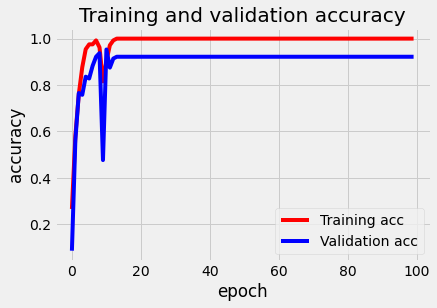

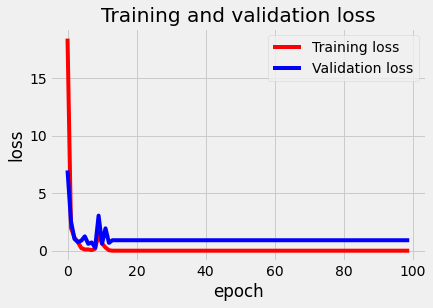

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#Graphing our training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
#plt.savefig('plotting akurasi model resnet50_b64.png')
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
#plt.savefig('plotting loss model resnet50_b64.png')
plt.show()


In [17]:
print('Train accuracy & loss:', model.evaluate(train_data))
print('\n')
print('Test accuracy & loss:', model.evaluate(valid_data))

66/66 [==============================] - 2s 33ms/step - loss: 7.7921e-06 - accuracy: 1.0000
Train accuracy & loss: [7.792064025125e-06, 1.0]


16/16 [==============================] - 1s 32ms/step - loss: 0.9086 - accuracy: 0.9219
Test accuracy & loss: [0.9085646867752075, 0.921875]


In [18]:
#define labels for testing
y_test = test_data.classes

#make prediction
yhat_test = np.argmax(model.predict(test_data), axis=1)

In [19]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

In [20]:
yhat_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], dtype=int64)

In [21]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm.Blues):
    
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    plt.grid(False)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 fontsize = 12,
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

[[21  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0]
 [ 0  0 25  0  0  0  0]
 [ 0  0  0 15  0  0  0]
 [ 0  0  0  0 36  0  0]
 [ 0  0  0  0  0 14  0]
 [ 0  0  0  0  0  0 22]]


C:\Users\ISYSRG.COM\Anaconda3\envs\classgrad\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  # Remove the CWD from sys.path while we load stuff.


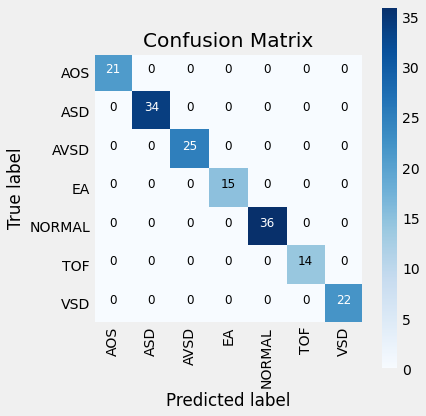

In [22]:
#get confusion matrix
cm = confusion_matrix(y_test, yhat_test)
print(cm)

#plot
plot_confusion_matrix(cm, classes, normalize=False)

In [23]:
#get classification report
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        22

    accuracy                           1.00       167
   macro avg       1.00      1.00      1.00       167
weighted avg       1.00      1.00      1.00       167



In [24]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
#Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# # Specificity or true negative rate
TNR = TN/(TN+FP) 
# # Precision or positive predictive value
PPV = TP/(TP+FP)
# # Negative predictive value
NPV = TN/(TN+FN)
# # Fall out or false positive rate
FPR = FP/(FP+TN)
# # False negative rate
FNR = FN/(TP+FN)
# # False discovery rate
FDR = FP/(TP+FP)
# # Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

In [25]:
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', TP)
print('\nTrue Negatives(TN) = ', TN)
print('\nFalse Positives(FP) = ', FP)
print('\nFalse Negatives(FN) = ', FN)

print('\nAccuracy = ',ACC)
print('\nSensitivity = ', TPR)
print('\nPrecision = ', PPV)
print('\nSpecificity = ', TNR)

print('\nAccuracy = ', sum(ACC)/7)
print('\nRecall = ', sum(TPR)/7)
print('\nPrecision = ', sum(PPV)/7)
print('\nSpecificity = ', sum(TNR)/7)

Confusion matrix

 [[21  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0]
 [ 0  0 25  0  0  0  0]
 [ 0  0  0 15  0  0  0]
 [ 0  0  0  0 36  0  0]
 [ 0  0  0  0  0 14  0]
 [ 0  0  0  0  0  0 22]]

True Positives(TP) =  [21. 34. 25. 15. 36. 14. 22.]

True Negatives(TN) =  [146. 133. 142. 152. 131. 153. 145.]

False Positives(FP) =  [0. 0. 0. 0. 0. 0. 0.]

False Negatives(FN) =  [0. 0. 0. 0. 0. 0. 0.]

Accuracy =  [1. 1. 1. 1. 1. 1. 1.]

Sensitivity =  [1. 1. 1. 1. 1. 1. 1.]

Precision =  [1. 1. 1. 1. 1. 1. 1.]

Specificity =  [1. 1. 1. 1. 1. 1. 1.]

Accuracy =  1.0

Recall =  1.0

Precision =  1.0

Specificity =  1.0


# VISUALISASI

In [26]:
# import tensorflow as tf
# import tensorflow.keras as keras
# import os


# import numpy as np
# print('tensorflow {}'.format(tf.__version__))
# print("keras {}".format(keras.__version__))
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [27]:
# import matplotlib.pyplot as plt

In [28]:
# model = tf.keras.models.load_model('F:/CitraBatch4/Robi/SiViNetBS8Lr00001NLM.h5')
# model.summary()

In [29]:
# layers = next(x for x in model.layers[::-1] if isinstance(x, K.layers.Conv2D))
# # layers.name

In [30]:
# #Bundle Prediction

# import cv2
# import glob
# import os

# #path yang akan digunakan
# root_path_testing = 'F:/Citrabatch4/Robi/FIXED/dataunseen/biasa/TOF/*.jpg'
# root_path_saving = 'F:/Citrabatch4/Robi/FIXED/hasil predict/SiviNet/BS8/dataunseen/TOF'
# file_path = glob.glob(root_path_testing)

# #make new directory
# os.makedirs(root_path_saving, exist_ok = True)
# for path in file_path:

#     _img = keras.preprocessing.image.load_img(path ,target_size=(150,150))

#     #preprocess image to get it into the right format for the model
#     img = keras.preprocessing.image.img_to_array(_img)
#     img = img.reshape((1, *img.shape))
#     y_pred = model.predict(img)

#     images = tf.Variable(img, dtype=float)

#     with tf.GradientTape() as tape:
#         pred = model(images, training=False)
#         class_idxs_sorted = np.argsort(pred.numpy().flatten())[::-1]
#         loss = pred[0][class_idxs_sorted[0]]

#     grads = tape.gradient(loss, images)

#     dgrad_abs = tf.math.abs(grads)

#     dgrad_max_ = np.max(dgrad_abs, axis=3)[0]

#     ## normalize to range between 0 and 1
#     arr_min, arr_max  = np.min(dgrad_max_), np.max(dgrad_max_)
#     grad_eval = (dgrad_max_ - arr_min) / (arr_max - arr_min + 1e-18)

#     fig, axes = plt.subplots(1,2,figsize=(12,9))
#     axes[0].imshow(_img)
#     axes[1].imshow(grad_eval,cmap="jet",alpha=0.8)
# #         plt.savefig('plot_onlycbar.png')
#     filename = path.split('\\')[-1]
#     print(filename)
#     plt.savefig(root_path_saving + filename)